In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [2]:
def read_are_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'are.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(float(val))
            
    return res


In [3]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [4]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [5]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [6]:
def read_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    sorted_fsd = dict(sorted(fsd.items()))
                            
                    res.append(sorted_fsd)
            
    return res

# read_fsd_data()

In [7]:
def parse_line(key, line):
    string_key = line.split(") ")[0]
    string_key += ")"

    left = line.split(") ")[1]

    left = left.replace("]", "")
    left = left.replace("[", "")
    splitted = left.split(" ")
    estimate = int(splitted[0])
    
    return string_key, estimate

In [8]:
def prepare_profiler_final_fsd_dict(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                                epochs=['10']):
    fs_freq_map = {}
    profiler_file = []
    
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_file.append(file_name)
        # has_same_dist = 0
        # if file_name.split("-")[0] == "zipf4":
        #     continue
        # for item in profiler_file:
        #     if file_name.split("-")[0] == item.split("-")[0]:
        #         has_same_dist = 1
        #         break
        # if has_same_dist == 0:
        #     profiler_file.append(file_name)
        
    
    for epoch in epochs:
        for file in profiler_file:
            path = f"../SketchPadding/{algo}/{file}/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    flowkey_path = os.path.join(p, "flowkey.txt")
                    fs_freq_map[file] = {}
            
                    f = open(flowkey_path)
                    key = f.readline().strip()
                    # print(key)
                    for line in f:
                        string_key, estimate = parse_line(key, line.strip())
                        fs_freq_map[file][string_key] = estimate
                    f.close()
            
    return fs_freq_map


In [9]:
def get_profiler_sampled_fsd(profiler_fs_freq_map, randomk_key):
    fsd = {}
    for key in randomk_key:
        if key in profiler_fs_freq_map.keys():
            if profiler_fs_freq_map[key] in fsd.keys():
                fsd[profiler_fs_freq_map[key]] += 1
            else:
                fsd[profiler_fs_freq_map[key]] = 1
                
    sorted_fsd = dict(sorted(list(fsd.items())))
        
    return sorted_fsd
            

In [10]:
def get_sampled_flowkey(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                            epochs=['10'], dataset = "caida0517-125w_10_.pcap", window_size=200, predict_time=1):
    
    sampled_flowkey = []
    for epoch in epochs:
        
        path = f"../SketchPadding/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                for l in range(0, 1):
                    key_window_dir = '%s/level_%02d/key_window_%d/' % (p, l, window_size)
                    if not os.path.isdir(key_window_dir):
                        continue
                    
                    cnt = 0 # count for predict dist
                    for file in sorted(os.listdir(key_window_dir)):
                        key_list = []
                        key_window_path = os.path.join(key_window_dir, file)
                            
                        f = open(key_window_path)
                        key = f.readline().strip()
                        for line in f:
                            string_key, estimate = parse_line(key, line.strip())
                            key_list.append(string_key)
                            
                        f.close()
                        
                        sampled_flowkey.append(key_list)
                        
                        cnt += 1
                        if predict_time != 0 and cnt >= int(predict_time*1000/window_size):
                            break
                        
                              
    return sampled_flowkey


## Prepare Dataset

In [11]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 


# # # same dist, caida
for a in caida0517:
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

            
# # same dist, zipf
for a in zipf2a:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf2b:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, caida + zipf2b
for a in caida0517:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # diff dist, zipf2a + caida
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
for a in zipf2b:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap', 'caida0517-500w_6_caida0816-600w_4.pcap', 'caida0517-500w_6_caida0816-300w_4.pcap', 'caida0517-500w_6_caida0816-150w_4.pcap', 'caida0517-250w_6_caida0816-600w_4.pcap', 'caida0517-250w_6_caida0816-300w_4.pcap', 'caida0517-250w_6_caida0816-150w_4.pcap', 'caida0517-125w_6_caida0816-600w_4.pcap', 'caida0517-125w_6_caida0816-300w_4.pcap', 'caida0517-125w_6_caida0816-150w_4.pcap', 'caida0816-600w_6_caida0517-500w_4.pcap', 'caida0816-600w_6_caida0517-250w_4.pcap', 'caida0816-600w_6_caida0517-125w_4.pcap', 'caida0816-300w_6_caida0517-500w_4.pcap', 'caida0816-300w_6_caida0517-250w_4.pcap', 'caida0816-300w_6_caida0517-125w_4.pcap', 'caida0816-150w_6_caida0517-500w_4.pcap', 'caida0816-150w_6_caida

### Predict by MRD changes in adjacent timepoint

In [12]:
def prepare_profiler_bins():
    res = {}
    
    profiler_path = "../traffic_generator/fs_dist/"
    profiler_fsd = []
    for file in sorted(os.listdir(profiler_path)):
        profiler_fsd.append(file)
        
    for file in profiler_fsd:
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
                
        # calcualte CDF
        cdf = {}
        culmulative_prob = 0.0
        for fs, freq in sorted(fsd.items()):
            culmulative_prob += (freq/fn)
            cdf[fs] = culmulative_prob
            
        # get bins
        bin = {}
        idx = 0
        for fs, prob in sorted(cdf.items()):
            while idx < round(prob * 100):
                bin[idx] = fs
                idx += 1
                
        res[file[:-4]] = bin
            
    return res
    
# prepare_profiler_bins()

In [13]:
def get_quantized_mapping(fsd, bins):
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bins[idx]:
            if idx < len(bins) - 1:
                idx += 1
            else:
                break
            
        if bins[idx] in qfsd.keys():
            qfsd[bins[idx]] += freq
        else:
            qfsd[bins[idx]] = freq
            
        
    return qfsd

In [14]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    if typ == "MRD":
        plt.ylabel('MRD')
    else:
        plt.ylabel('Value')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [15]:
def plot_multi_mrd_variation(mrds, window_size=200):
    
    res = []
    labels = []
    
    for name, mrd in mrds.items():
        labels.append(f'{int(int(name.split("_")[-1])*4/1024)} KB')
        res.append(mrd)
    
    # print(name)
    # print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('WMRD')
    plt.title(f'Impact of Different Memory on Sketch FSD Error. {list(mrds.keys())[0].split("_")[0]}')
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [16]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (4+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [17]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

    # MRD_nom = 0
    # MRD_denom = 0
    # for key in fsd1.keys():
    #     true = fsd1[key]
    #     if key in fsd2.keys():
    #         est = fsd2[key]
    #     else:
    #         est = 0
            
    #     MRD_nom += abs(true - est)
    #     MRD_denom += float(true + est)/2
    # MRD = MRD_nom/MRD_denom
    
    # return MRD

In [18]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [19]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [20]:
predict(width=widths, datasets=pcap_file[30:48], window_size=200, dev=3.4, ws=25)

0
zipf2a-150w_6_zipf2b-400w_4_4096
	FSD MRD 
		 [None, None, None, None, 0.19327543424317617, 0.02346283018210127, 0.10110812740065944, 0.010121141990550253, 0.0243906918497393, 0.13500472397721647, 0.03325290586762247, 0.0834887997988859, 0.012382240164019453, 0.0026424333774069386, 0.022371555184864278, 0.05127462298570035, 0.05459608124498194, 0.05745592558660395, 0.010181246690240786, 0.07570500578623596, 0.14129554655870435, 0.0009274830555978664, 0.04421973368989929, 0.010392550290682645, 0.0005454049631852254, 0.08795226063114892, 0.11127819548872186, 0.000402251058809866, 0.14585747894366985, 0.09524488486490346, 0.1729407921007733, 0.370652969778581, 0.01171723871110375, 0.61288223812622, 0.0005526999392030385, 0.005323653962492458, 0.2614732696317026, 0.23435332517339857, 0.09066896353718046, 0.007934336525307728, 0.004524886877828038, 0.07833284067395807, 0.047919293820933184, 0.016492720010307993, 0.04229481077709529, 0.04841984889614248, 0.14749234753943963, 0.145476486101

### Predict by MRD changes (from profiler) in adjacent timepoint

In [21]:
def get_profiler_fsd():
    # get profiler dist
    profiler_fsd = {}
    profiler_path = "../traffic_generator/fs_dist/"
    for file in sorted(os.listdir(profiler_path)):
        # print(file)
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
    
        profiler_fsd[file[:-4]] = fsd
        
    return profiler_fsd

In [ ]:
# calculate jsd
import numpy as np
from scipy.spatial.distance import jensenshannon

def calculate_jsd(fsd1, fsd2):
    
    # Convert dictionaries to arrays for easier manipulation
    keys = sorted(set(fsd1.keys()) | set(fsd2.keys()))
    flow_sizes = np.array(keys)
    freq1 = np.array([fsd1.get(flow_size, 0) for flow_size in keys])
    freq2 = np.array([fsd2.get(flow_size, 0) for flow_size in keys])

    # Calculate probability distributions
    prob_distribution1 = freq1 / np.sum(freq1)
    prob_distribution2 = freq2 / np.sum(freq2)

    # Calculate Jensen-Shannon divergence
    js_distance = jensenshannon(prob_distribution1, prob_distribution2)

    # print("Jensen-Shannon Divergence:", js_distance)
    return  js_distance

In [22]:
def predict_by_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    # # find dist
    # for i in range(len(label)):
    #     target_dist = []
    #     print(label[i])
    #     for j in range(int(1000/window_size)):
    #         dist_name, dist = find_distribution(res_fsd[label[i]][4+j])
    #         print(dist_name)
    #     print("---\n")
        
    # profiler_fsd = get_profiler_fsd()
    profiler_fsd_dict = prepare_profiler_final_fsd_dict()
    
    
    for i in range(len(label)):
        
        # get profiler fsd
        target_fsd_dict = profiler_fsd_dict[(label[i].split("_")[0] + "_10_.pcap")]
        
        print("profiler: ", label[i].split("_")[0])
        
        # calculate mrd
        for j in range(0, len(res_fsd[label[i]])):
            target_sampled_fsd = get_profiler_sampled_fsd(target_fsd_dict, res_flowkey[label[i]][j])
            res_mrd[label[i]].append(calculate_mrd(target_sampled_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')

        for j in range(2, len(res_mrd[label[i]])):
            res_mrd_var[label[i]].append(abs(res_mrd[label[i]][j] - res_mrd[label[i]][j-1]))  
            
        for j in range(3, len(res_mrd_var[label[i]])):
            res_mrd_sec_var[label[i]].append(abs(res_mrd_var[label[i]][j] - res_mrd_var[label[i]][j-1]))
            
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')
        # plot_mrd_variation(res_mrd_var[label[i]], label[i], window_size, 'Var')
        # plot_mrd_variation(res_mrd_sec_var[label[i]], label[i], window_size, 'Sec Var')
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][3:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' FSD predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    

In [ ]:
predict_by_dist(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

### Predict distribution

In [20]:
def plot_mrd(file_name, mrd_list, window_size, predict_time, ans):
    
    res = []
    labels = []
    
    for i in range(len(mrd_list[0])):
        single_mrd = []
        for j in range(len(mrd_list)):
            single_mrd.append(mrd_list[j][i])
        res.append(single_mrd)
        
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for name in sorted(os.listdir(profiler_folder_path)):
        if name.split("-")[0] == "zipf4":
            continue
        labels.append(name.split("_")[0])    
        
        
    plt.figure(figsize=(8, 4))
    
    for i in range(0, len(res)):
        if labels[i] == ans:
            plt.plot(res[i], label=labels[i], color='tab:red', linewidth=3.0)
        else:
            plt.plot(res[i], label=labels[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('MRD')
    plt.title('%s ,Random K MRD Variation' % (file_name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(predict_time*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

In [21]:
def find_distribution(profiler_fsd_dict, flowkey_list, unknown_fsd):
    # get profiler dist
    profiler_fsd = {}
    for name, map in profiler_fsd_dict.items():
        profiler_fsd[name] = get_profiler_sampled_fsd(map, flowkey_list)
        
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        if dist == {}:
            # print(name, "is empty")
            mrd = abs(calculate_mrd(unknown_fsd, dist))
            # continue
        else:
            mrd = calculate_mrd(dist, unknown_fsd)
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    # for name, dist in profiler_fsd.items():
    #     mrd = calculate_mrd(dist, unknown_fsd)
    #     all_mrd[name] = mrd
    #     if mrd < min_mrd:
    #         min_mrd = mrd
    #         predict_dist = name
           
    # print(all_mrd)
    # print(predict_dist)       
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
    
    # print(len(mrds))
    # return predict_dist, profiler_fsd[predict_dist]
    return predict_dist, mrds
    

In [22]:
def predict_distribution(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    predict_time = 2
    profiler_fsd_dict = prepare_profiler_final_fsd_dict()
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        sampled_flowkey = get_sampled_flowkey(dataset=pcap_file_name, predict_time=predict_time)
        # print(len(sampled_flowkey))
        print("now finding ", pcap_file_name, "'s distribution")
        vote = {}
        all_mrds = []
        for j in range(int(predict_time * 1000 / window_size)):
            dist_name, mrds = find_distribution(profiler_fsd_dict, sampled_flowkey[j], res_fsd[label[i]][j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if pcap_file_name.split("_")[0] == max(vote, key=vote.get).split("_")[0]:
            success += 1
        else:
            if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                success += 1
        
        print("==> ", max(vote, key=vote.get))
        # plot_mrd(pcap_file_name[:-5], all_mrds, window_size, predict_time, pcap_file_name.split("_")[0])
        print("---\n")
        
    
    print(f"predict : {success}/{len(label)} , ({success*100/len(label)} %)")
 

In [ ]:
predict_distribution(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

---

In [104]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
        # if file_name.split("-")[0] == "zipf4":
            continue
        profiler_fsd[file_name[:-9]] = []
    
    # profiler_fsd["caida0517-500w"] = []
    # profiler_fsd["caida0816-600w"] = []
    # profiler_fsd["zipf2a-150w"] = []
    profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [24]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    return avg_fsd


In [75]:
def find_dist_by_dirty_fsd(profiler_fsd, unknown_fsd):
    
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        mrd = calculate_mrd(dist, unknown_fsd)
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
        
    print(predict_dist, all_mrd)
    
    # print(len(mrds))
    # return predict_dist, profiler_fsd[predict_dist]
    return predict_dist, mrds
    

In [97]:
def predict_dist_by_dirty_fsd(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20, start=0):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    predict_time = 2
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    # prepare profiler avg dirty fsd
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        # print(len(sampled_flowkey))
        print("now finding ", pcap_file_name, "'s distribution")
        vote = {}
        all_mrds = []
        
        # selected_fsd = res_fsd[label[i]][start:min(start+int(predict_time * 1000 / window_size), len(res_fsd[label[i]]))]
        # avg_selected_fsd = get_avg_fsd(selected_fsd)
        # dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, avg_selected_fsd)
        # vote[dist_name] = 1
        
        for j in range(min(int(predict_time * 1000 / window_size), len(res_fsd[label[i]])-start)):
            print(start + j)
            dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, res_fsd[label[i]][start+j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if start == 0 or start == 5:
            if pcap_file_name.split("_")[0] == max(vote, key=vote.get).split("_")[0]:
                success += 1
            else:
                if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
                elif pcap_file_name.split("-")[0][:5] == "caida" and max(vote, key=vote.get).split("-")[0][:5] == "caida":
                    success += 1
                elif (pcap_file_name.split("_")[0] == "zipf2b-100w" or pcap_file_name.split("_")[0] == "zipf2b-200w") and max(vote, key=vote.get) == "zipf2a-150w":
                    success += 1
        else:
            if pcap_file_name.split("_")[2] == max(vote, key=vote.get).split("_")[0]:
                success += 1
            else:
                if pcap_file_name.split("-")[1].split("_")[-1] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
                elif pcap_file_name.split("-")[1].split("_")[-1][:5] == "caida" and max(vote, key=vote.get).split("-")[0][:5] == "caida":
                    success += 1
                elif (pcap_file_name.split("_")[2] == "zipf2b-100w" or pcap_file_name.split("_")[2] == "zipf2b-200w") and max(vote, key=vote.get) == "zipf2a-150w":
                    success += 1
        
        print("==> ", max(vote, key=vote.get), vote)
        # plot_mrd(pcap_file_name[:-5], all_mrds, window_size, predict_time, pcap_file_name.split("_")[0])
        print("---\n")
        
    
    print(f"predict : {success}/{len(label)} , ({success*100/len(label)} %)")
 

In [98]:
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[:12], window_size=200, dev=3, ws=25, start=0)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[12:21], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[21:30], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[30:39], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[39:48], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[48:57], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[57:66], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[66:75], window_size=200, dev=3, ws=25,start=30)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[75:84], window_size=200, dev=3, ws=25,start=30)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[84:93], window_size=200, dev=3, ws=25,start=30)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[93:102], window_size=200, dev=3, ws=25,start=30)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[102:111], window_size=200, dev=3, ws=25,start=30)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[111:120], window_size=200, dev=3, ws=25,start=30)

now finding  caida0517-500w_6_caida0816-600w_4.pcap 's distribution
30
caida0517-500w {'caida0517-125w': 1.2105628908964559, 'caida0517-250w': 0.9144893111638955, 'caida0517-500w': 0.44741057127602774, 'zipf2a-150w': 1.3637583892617449, 'zipf2a-35w': 1.6400679117147707, 'zipf2a-75w': 1.531782945736434, 'zipf2b-400w': 0.8341384863123994}
31
caida0517-500w {'caida0517-125w': 1.2033542976939204, 'caida0517-250w': 0.9093078758949881, 'caida0517-500w': 0.4364611260053619, 'zipf2a-150w': 1.3576248313090418, 'zipf2a-35w': 1.6170940170940171, 'zipf2a-75w': 1.5101404056162246, 'zipf2b-400w': 0.831266846361186}
32
caida0517-500w {'caida0517-125w': 1.2156315422191206, 'caida0517-250w': 0.9106078665077473, 'caida0517-500w': 0.37171933583288697, 'zipf2a-150w': 1.3692722371967656, 'zipf2a-35w': 1.6040955631399318, 'zipf2a-75w': 1.4984423676012462, 'zipf2b-400w': 0.7894453419493808}
33
caida0517-500w {'caida0517-125w': 1.2583333333333333, 'caida0517-250w': 0.9032640949554896, 'caida0517-500w': 0.3543

### Test WMRD work

In [ ]:
## test WMRD work
def cal_mrd(fsd1, fsd2):
    
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD
 
def plot(mrd_var, name):
    plt.figure(figsize=(8, 4))
    # Plot each data point
    for delta, data_dict in mrd_var.items():
        x = list(data_dict.keys())
        y = list(data_dict.values())
        plt.plot(x, y, marker='o', linestyle='-', label=f'Delta - {delta}')

    # Customize the plot
    plt.xlabel('Sampled Number')
    plt.ylabel('WMRD')
    plt.xticks(list(mrd_var[next(iter(mrd_var))].keys()))
    plt.title('Plot MRD Variation - %s' % (name))
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
    
profiler_fsd = get_profiler_fsd()
sample_list = [10, 100, 500, 1000, 5000]
# sample_list = [500]
delta = [1, 10, 50, 100]
for key in profiler_fsd.keys():
    print(key, len(profiler_fsd[key].keys()))
    
    mrd_var = {}
    for d in delta:
        changed_profiler_fsd = {}
        # changed_profiler_fsd[0] = profiler_fsd[key]
        for ss in sample_list:
            fsd = copy.deepcopy(profiler_fsd[key])
            # print(ss, len(fsd.keys()))
            if ss > len(fsd.keys()):
                break
            key_list = list(profiler_fsd[key].keys())
            random.shuffle(key_list)
            for i in range(ss):
                if random.randint(1,2) == 1: 
                    fsd[key_list[i]] = max(0, fsd[key_list[i]]-d)
                else:
                    fsd[key_list[i]] += d
                    
            changed_profiler_fsd[ss] = dict(sorted(fsd.items()))
            
        # for item in changed_profiler_fsd.items():
        #     print(item)
        mrds = {}
        mrds[0] = cal_mrd(profiler_fsd[key], profiler_fsd[key])
        for ss, val in changed_profiler_fsd.items():
            mrds[ss] = cal_mrd(profiler_fsd[key], val)
            
        mrd_var[d] = mrds
        
    # print(mrd_var)
    plot(mrd_var, key)
    print("---")
    


### Test the impact of Sketch error on MRD

In [365]:
def predict_sketch_error_single_slot(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd_est = {}
    res_fsd_gt = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total2 = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total2 = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd_est[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_fsd_gt[name] = fsd_total2[:-1] # ignore last window (less than 200ms)
            res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            
    
    for i in range(len(label)):

        # calculate mrd
        for j in range(0, len(res_fsd_est[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(res_fsd_gt[label[i]][j], res_fsd_est[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
            
    c = len(width)
    for i in range(int(len(label)/c)):
        mrd_set = {}
        for j in range(c):
            mrd_set[label[i*c+j]] = res_mrd[label[i*c+j]]
        
        plot_multi_mrd_variation(mrd_set, window_size)

In [366]:
def predict_sketch_error_accumulate(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd_est = {}
    res_fsd_gt = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total2 = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd_est[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_fsd_gt[name] = fsd_total2[:-1] # ignore last window (less than 200ms)
            # res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        # calculate mrd
        for j in range(0, len(res_fsd_est[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(res_fsd_gt[label[i]][j], res_fsd_est[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        print(f'mean gt MRD: {sum(res_mrd[label[i]][1:])/len(res_fsd_est[label[i]][1:])}')
        plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')




In [ ]:
# predict_sketch_error_accumulate(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)
predict_sketch_error_single_slot(width=[4096, 8192, 16384, 32768, 65536], datasets=pcap_file[:12], window_size=200, dev=3, ws=25)

In [380]:
def plot_multi_are_variation(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida20180517_10_caida20180816_0.pcap'], window_size=200):
    
    for d in datasets:
        res = []
        labels = []
        for w in width:
            are = read_are_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            res.append(are)
            labels.append(f'{int(w*4/1024)} KB')
    
        # print(mrd_var)

        plt.figure(figsize=(12, 4))
            
        for i in range(len(res)):
            plt.plot(res[i], label=labels[i])

        # Add labels and legend
        plt.xlabel('Time (sec)')
        plt.ylabel('ARE (%)')
        plt.title(f'Impact of Different Memory on Sketch ARE. {d[:-9]}')
        # plt.axhline(10000, c="black")
        ticks = [i for i in range(int(10*1000/window_size) + 1)]
        adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
        plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
        plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

        # Show the plot
        plt.show()
        

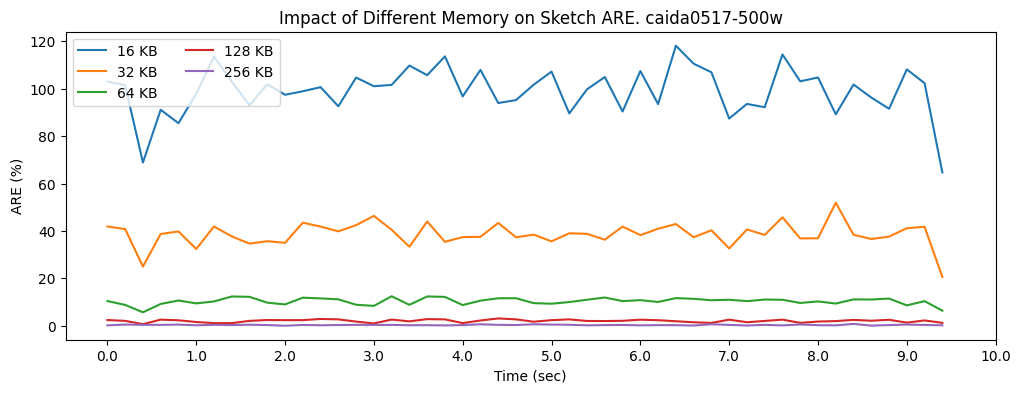

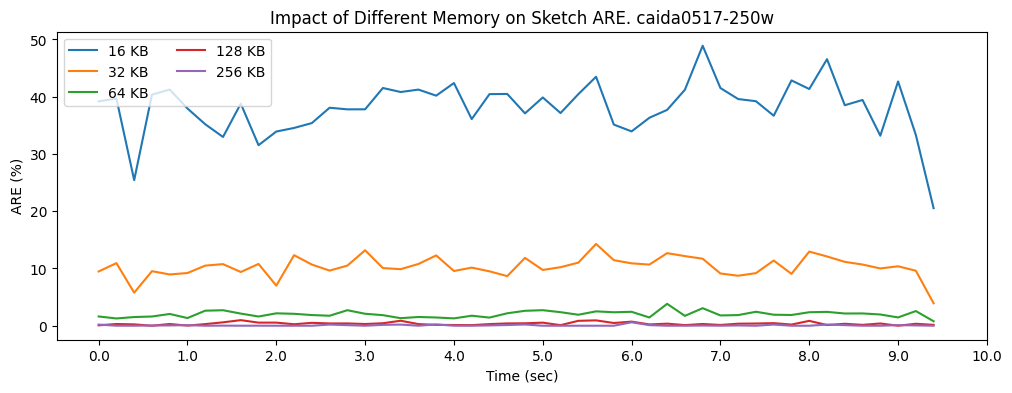

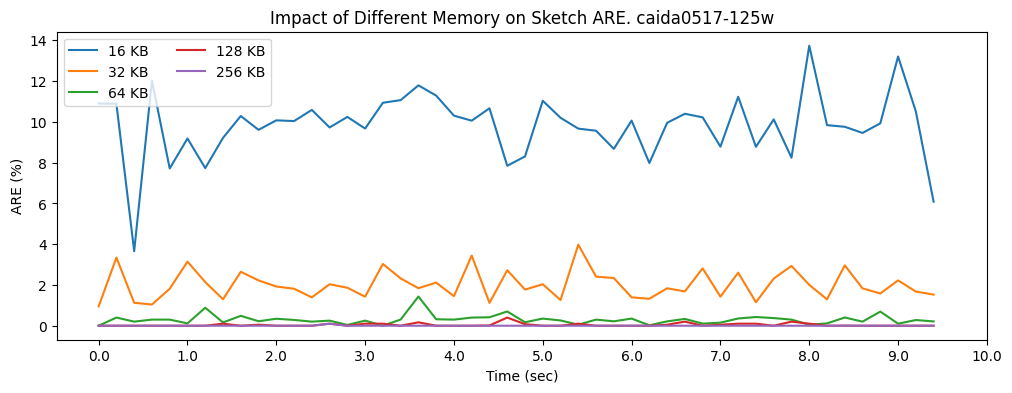

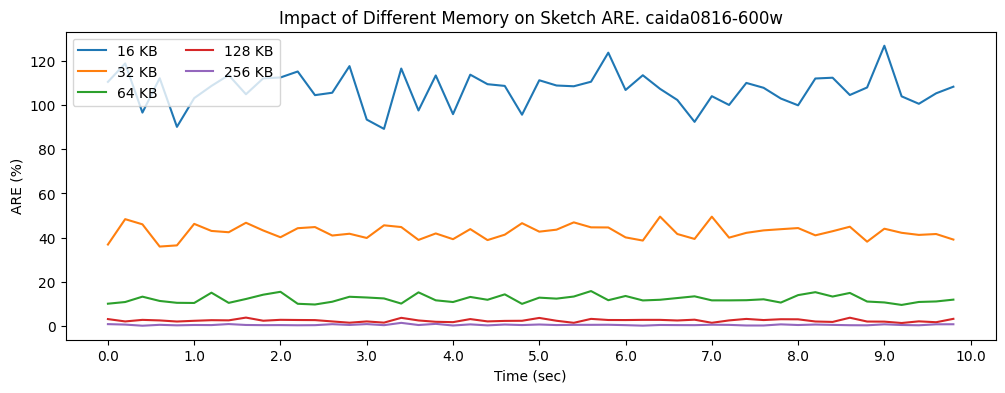

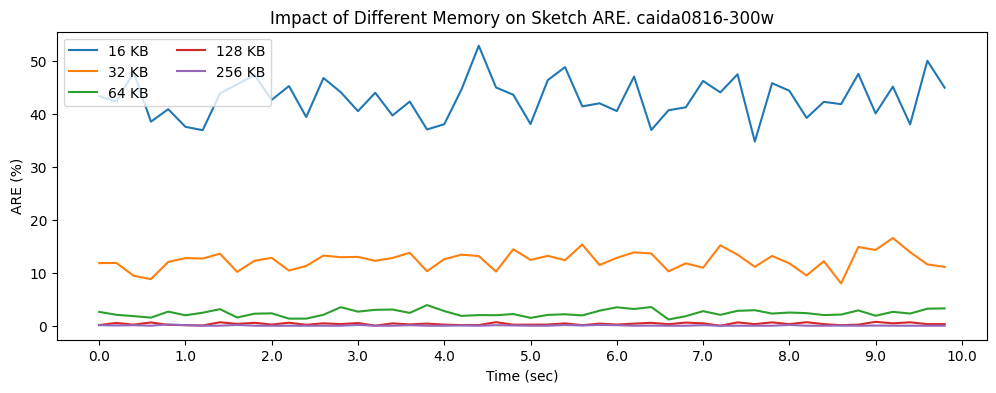

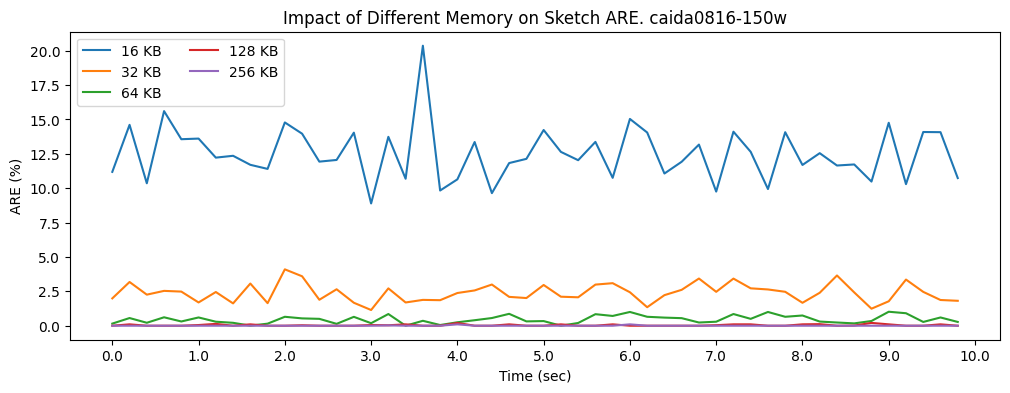

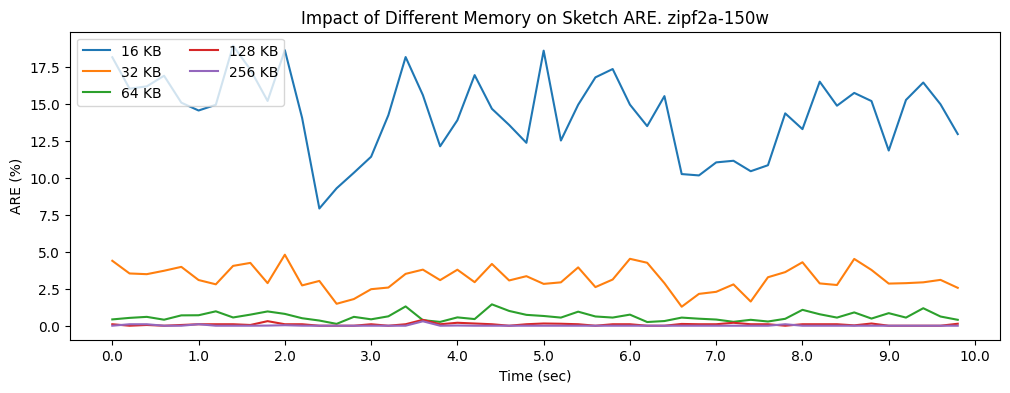

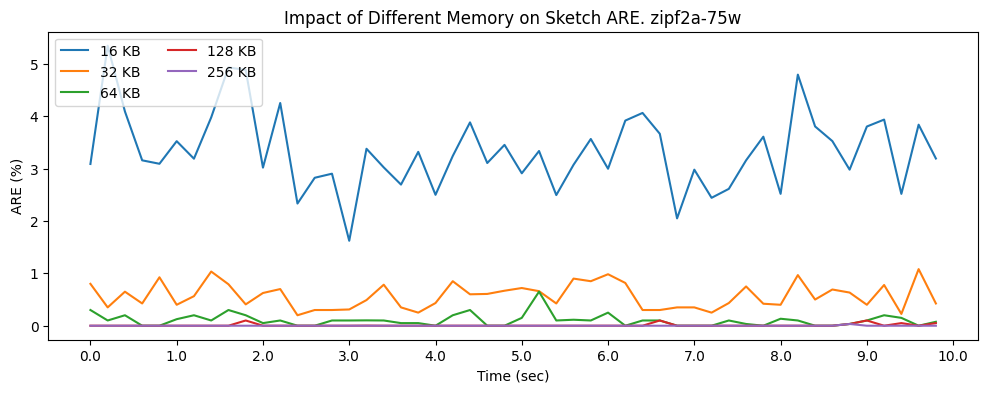

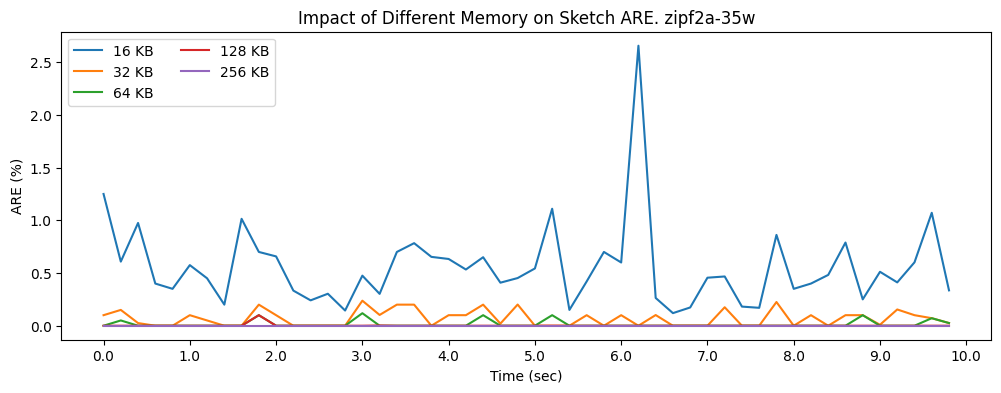

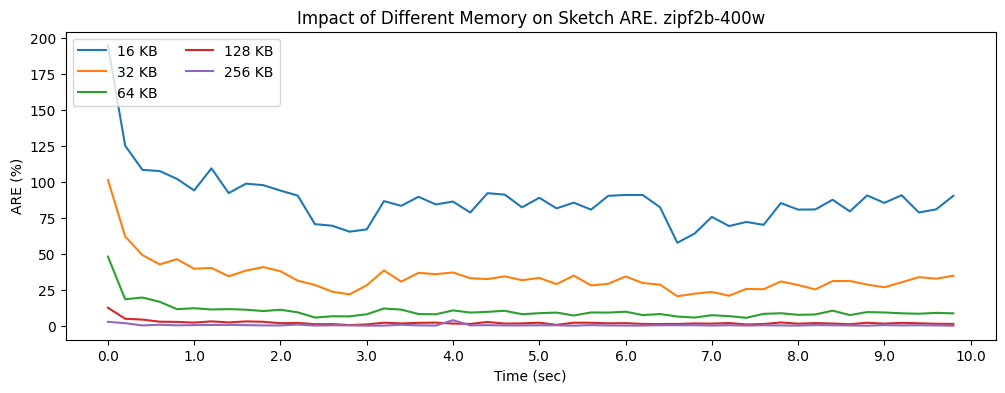

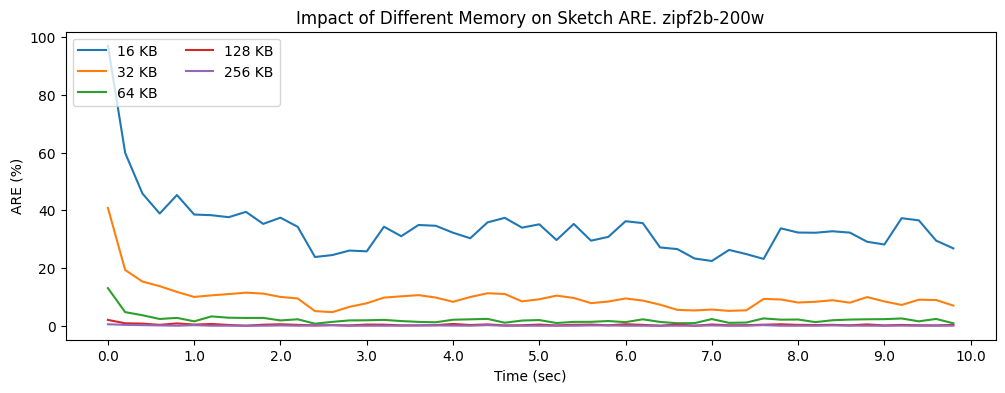

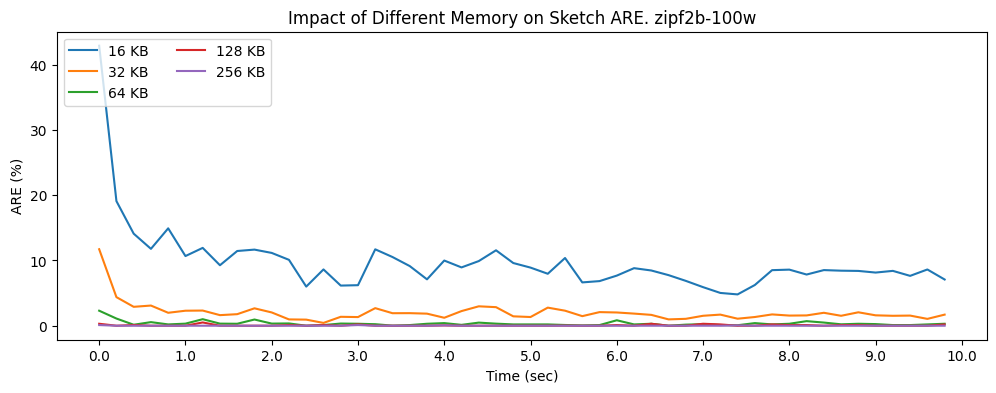

In [381]:
plot_multi_are_variation(width=[4096, 8192, 16384, 32768, 65536], datasets=pcap_file[:12], window_size=200)

### Relationship between dataset length and FSD

In [ ]:
def draw_flow_size_distribution(fsds):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    cnt = 0
    for fsd in fsds: 
        
        flow_size = list(fsd.keys())
        frequency = list(fsd.values())
        total_packets = sum([key * val for key, val in fsd.items()])
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(f't{2*cnt+1}-t{2*cnt+2}')
        cnt += 1
    
    labels[-1] = "gt"
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle='-', label = labels[i])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
# draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

def cal_fsd(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], window_size=200):
    profiler_file = []
    
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_file.append(file_name)
        # has_same_dist = 0
        # if file_name.split("-")[0] == "zipf4":
        #     continue
        # for item in profiler_file:
        #     if file_name.split("-")[0] == item.split("-")[0]:
        #         has_same_dist = 1
        #         break
        # if has_same_dist == 0:
        #     profiler_file.append(file_name)
        
    

    for epoch in epochs:
        for file in profiler_file:
            path = f"../SketchPatternQuery/{algo}/{file}/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            est_fsd = []
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                    
                    all_fsd = []
                    for window_file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, window_file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        all_fsd.append(fsd)
                        
                    
                    for i in range(0, 5):
                        start = 10*i
                        end = min(10*i+10, len(all_fsd))
                        all_keys = sorted(set().union(*[d.keys() for d in all_fsd[start:end]]))
                        sum_fsd = {key: 0 for key in all_keys}
                        for d in all_fsd[start:end]:
                            for key, val in d.items():
                                sum_fsd[key] = sum_fsd[key] + val
                    
                        avg_fsd = {key: int(math.ceil(val/len(all_fsd[start:end])))*len(all_fsd) for key, val in sum_fsd.items()}
                        est_fsd.append(avg_fsd)
                        
                    
            gt_fsd = {}
            fileName = f"/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{file[:-9]}.txt"
            with open(fileName, "r") as ff:
                for line in ff:
                    items = line.strip().split(" ")
                    gt_fsd[int(items[0])] = int(items[1])
                    
            est_fsd.append(gt_fsd)
            
            draw_flow_size_distribution(est_fsd)


In [ ]:
cal_fsd()

---

In [ ]:
def test_normalize_fsd():
    
    fsd1 = {i: 0 for i in range(1, 101)}
    fsd2 = {i: 0 for i in range(1, 101)}
    
    fsd1[1] = 1000
    prev_max = 1000
    for i in range(2,101):
        rn = random.randint(1,10)
        if rn <= 6:
            fsd1[i] = random.randint(1, prev_max)
            prev_max = fsd1[i]
    
    # print(fsd1)
    
    for i in range(1, 101):
        if fsd1[i] == 0:
            rn = random.randint(1,2)
            if rn == 1:
                fsd2[i] = random.randint(1, 10)
        else:
            fsd2[i] = int(fsd1[i] * (random.randint(10,20)/10))
        
            
    # print(fsd2)
    
    total1 = sum(list(fsd1.values()))
    total2 = sum(list(fsd2.values()))
    fsd1_norm = {key: val/total1 for key, val in fsd1.items()}
    fsd2_norm = {key: val/total2 for key, val in fsd2.items()}
    
    mrd1 = calculate_mrd(fsd1, fsd2)
    mrd2 = calculate_mrd(fsd1_norm, fsd2_norm)
    
    return mrd1, mrd2
            

In [ ]:
mrd1 = 0.
mrd2 = 0.
n = 1000
cnt = 0
for i in range(n):
    m1, m2 = test_normalize_fsd()
    if m1 > m2:
        cnt+=1
    mrd1 += m1
    mrd2 += m2

print(cnt, mrd1/n, mrd2/n)

---

In [100]:
def draw_dirty_sampled_fsd(fsds):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    for name, fsd in fsds.items(): 
        
        flow_size = list(fsd.keys())
        frequency = list(fsd.values())
        total_packets = sum([key * val for key, val in fsd.items()])
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle='-', label = labels[i])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()

Total Flows:  468
Total Packets:  1299
Density:  2
Total Flows:  713
Total Packets:  2760
Density:  3
Total Flows:  902
Total Packets:  6767
Density:  7
Total Flows:  519
Total Packets:  1018
Density:  1
Total Flows:  207
Total Packets:  324
Density:  1
Total Flows:  319
Total Packets:  513
Density:  1
Total Flows:  892
Total Packets:  3946
Density:  4


/tmp/ipykernel_33392/3830639986.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_33392/3830639986.py:68: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


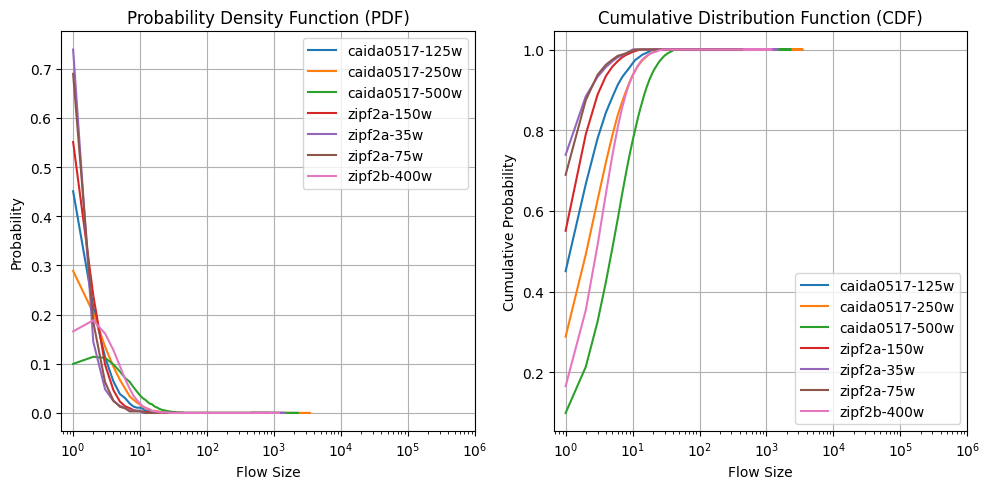

In [105]:
profiler_fsd = prepare_profiler_dirty_fsd_data()
# prepare profiler avg dirty fsd
profiler_avg_fsd = {}
for name, fsd_list in profiler_fsd.items():
    profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
    
draw_dirty_sampled_fsd(profiler_avg_fsd)
    
    